90


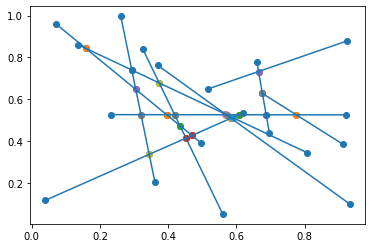

In [3]:
import skgeom as sg
import random as rand
from random import random
import itertools
from skgeom.draw import draw
import matplotlib.pyplot as plt

#random seed for reproducibility
rand.seed(24627245)

#segments
segments = []
for i in range(10):
    segments.append(sg.Segment2(sg.Point2(random(),random()),sg.Point2(random(),random())))

#intersections
intersections = []
i = 0
for s1,s2 in itertools.permutations(segments,2):
    i = i+1
    intersection = sg.intersection(s1,s2)
    if(intersection):
        intersections.append(intersection)

#to check the number of permutations of the segments
print(i)

#drawing the segments and intersections
for s in segments:
    draw(s)
for i in intersections:
    draw(i)

In [4]:
print(segments[:3])
print(intersections[:3])

[Segment_2(PointC2(0.925296, 0.879319), PointC2(0.517914, 0.649501)), Segment_2(PointC2(0.369159, 0.762226), PointC2(0.932094, 0.0977869)), Segment_2(PointC2(0.696465, 0.437991), PointC2(0.659573, 0.779387))]
[PointC2(0.664663, 0.732287), PointC2(0.569974, 0.525202), PointC2(0.583943, 0.508714)]


Point 1 inside polygon? Sign.POSITIVE
Point 2 inside polygon? Sign.NEGATIVE


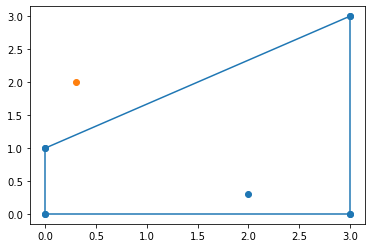

In [5]:
def draw_polygon(polygon):
    vertices = list(polygon.vertices)
    for i in range(1,len(vertices)):
        draw(sg.Segment2(vertices[i],vertices[i-1]))
    draw(sg.Segment2(vertices[len(vertices)-1],vertices[0]))

def get_polygon_edges(polygon):
    edges = []
    for i in range(1,len(vertices)):
        edges.append(sg.Segment2(vertices[i],vertices[i-1]))
    edges.append(sg.Segment2(vertices[len(vertices)-1],vertices[0]))
    return edges

#draw quadrilateral
polygon = sg.Polygon([sg.Point2(0,0),sg.Point2(3,0),sg.Point2(3,3),sg.Point2(0,1)])
draw_polygon(polygon)

#point inside the triangle
point_inside = sg.Point2(2,0.3)
draw(point_inside)

#point outside the triangle
point_outside = sg.Point2(0.3,2)
draw(point_outside)

print('Point 1 inside polygon?',polygon.oriented_side(point_inside))
print('Point 2 inside polygon?',polygon.oriented_side(point_outside))

intersection found:  PointC2(1.5, 0)
intersection found:  PointC2(3, 0.9)
is point 1 inside? True
intersection found:  PointC2(1.5, 0)
intersection found:  PointC2(3, 0.9)
is point 2 inside? False


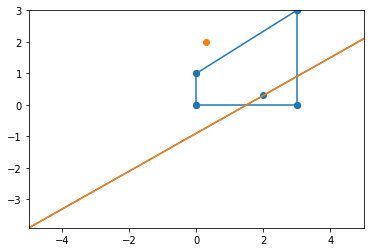

In [28]:
draw_polygon(polygon)
draw(point_inside)
draw(point_outside)
vertices = list(polygon.vertices)

def is_point_inside(polygon,point):
    line = sg.Line2(point_inside, sg.Point2((vertices[1].x()-vertices[0].x())/2,(vertices[1].y()-vertices[0].y())/2))
    draw(line)
    left = 0
    right = 0
    
    for edge in get_polygon_edges(polygon):
        intersection = sg.intersection(line,edge)
        if not intersection is None:
            print('intersection found: ', intersection)
            if(intersection.x() > point.x()):
                right = right + 1
            else:
                left = left + 1
    return (right % 2 == 1 and left % 2 == 1)

print('is point 1 inside?', is_point_inside(polygon,point_inside))
print('is point 2 inside?', is_point_inside(polygon,point_outside))

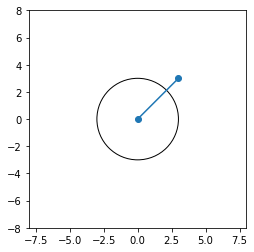

In [30]:
import numpy as np
circle = sg.Circle2(sg.Point2(0,0),9,sg.Sign.POSITIVE)
draw(circle)
p0_pr1 = sg.Segment2(sg.Point2(0,0),sg.Point2(3,3))
draw(p0_pr1)
#intersection = sg.intersection(circle,p0_pr1)
#draw(intersection)
print(circle.)

In [31]:
edge1 = sg.Segment2(sg.Point2(0,0),sg.Point2(3,3))
edge2 = sg.Segment2(sg.Point2(0,0),sg.Point2(-2,2))
print(edge1.supporting_line())

Line_2(-3, 3, -0)


In [18]:
pip install simpy

Note: you may need to restart the kernel to use updated packages.


In [54]:
from sympy import Point,Line
import sympy
import math
p0 = Point(0,0)
r = 3
pr1 = Point(3,3)
pl1 = Point(-3,3)
l_origin = Line(p0,Point(0,3))
l_start = Line(p0,pr1)
l_end = Line(p0,pl1)
angle_origin_end = l_origin.angle_between(l_end)
print(angle_origin_end)

pi/4


In [92]:
import numpy as np
p0 = sg.Point2(0,0)
r = 3
pref = sg.Point2(0,3)
pr1 = sg.Point2(3,3)
pl1 = sg.Point2(-3,3)
slope1 = (pr1.y()-p0.y())/(pr1.x()-p0.x())
slope2 = (pl1.y()-p0.y())/(pl1.x()-p0.x())
angle = None
if(slope1*slope2==-1):
    angle = math.pi/2
else:
    angle = np.arctan(np.abs((slope1-slope2)/(1+slope1*slope2)))
print(angle*180/math.pi)

90.0


origin on arc: PointC2(-1, 3.24264)
slope1 1.0 slope2 -1.0
angle 1.5707963267948966
exceptions
slope2 is horizontal
angle with horizontal: 0.7853981633974483
angle with vertical line
slope1 1.0 slope2 -0.0
angle 0.7853981633974483
offset: -45.0 1/3: 30.0
30.0
0.15425144988758405


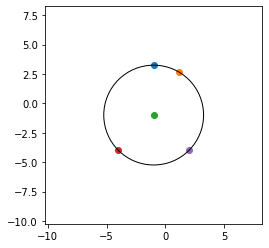

In [275]:
def get_angle(point1,point2,point3):
    angle = None
    slope1, slope2 = 0, 0
    try:
        slope1 = float((point1.y()-point2.y())/(point1.x()-point2.x()))
        slope2 = float((point3.y()-point2.y())/(point3.x()-point2.x()))
        print('slope1',slope1,'slope2',slope2)
        
        if(slope1*slope2==-1):
            angle = math.pi/2
        else:
            angle = np.arctan(((slope1-slope2)/(1+slope1*slope2)))
        print('angle',angle)
    except RuntimeError:
        
        print('exceptions')
        
        #if angle is with horizontal line
        if slope1 == 0 and slope2 != 0:
            angle = np.arctan(slope2)
            print('slope 1 is horizontal')
        elif slope2 == 0 and slope1 != 0:
            angle = np.arctan(slope1)
            print('slope2 is horizontal')
        
        print('angle with horizontal:',angle)
        if angle < 0:
            angle = np.abs(angle) + 90
            print('angle after adjustment:',angle)
        #if angle is with a vertical (undefined) line
        else:
            if(point1.x() == point2.x()):
                print('angle with vertical line')
                return (get_angle(sg.Point2(point2.x() + 5,point2.y()),point2,point3))
            elif(point2.x() == point3.x()):
                print('angle with vertical line')
                return (get_angle(point1,point2,sg.Point2(point2.x() + 5,point2.y())))
        print('angle in degrees',angle*180/math.pi)
    return angle*180/math.pi

def get_arc_midpoint(pl1,p0,pr1,index,radius):
    origin_on_arc = sg.Point2(p0.x(),p0.y()+radius)
    print('origin on arc:',origin_on_arc)
    angle_sector = get_angle(pl1,p0,pr1)
    angle_offset = get_angle(pl1,p0,origin_on_arc)
    if is_clockwise(pl1,origin_on_arc):
        angle_offset = -angle_offset
    angle_third = angle_sector/3
    print('offset:',angle_offset,'1/3:',angle_third)
    angle_of_interest = index*angle_third + angle_third/2 + angle_offset
    print(angle_of_interest)
    midpoint = sg.Point2(radius*np.sin(angle_of_interest*math.pi/180) + p0.x(),radius*np.cos(angle_of_interest*math.pi/180) + p0.y())
    
    draw(origin_on_arc)
    draw(midpoint)
    return midpoint
        

def is_clockwise(v1,v2):
    return -v1.x()*v2.y() + v1.y()*v2.x() > 0

p0 = sg.Point2(-1,-1)
pl1 = sg.Point2(-4,-4)
pr1 = sg.Point2(2,-4)
radius = np.sqrt(18)
pmid = get_arc_midpoint(pl1,p0,pr1,2,radius)
circle = sg.Circle2(p0,radius*radius,sg.Sign.POSITIVE)
draw(circle)
draw(p0)
draw(pl1)
draw(pr1)
print(np.cos(30))
#circle = sg.Circle2(p0,radius*radius,sg.Sign.POSITIVE)
#draw(circle)

In [270]:
print(get_angle(sg.Point2(np.sqrt(8),0),sg.Point2(0,0),sg.Point2(-2,2)))
print(get_angle(sg.Point2(3,5),p0,sg.Point2(p0.x(),p0.y()+3)))

p0 = sg.Point2(-1,-1)
pl1 = sg.Point2(-4,-4)
pref = sg.Point2(-1,3.24264)
print(get_angle(pl1,p0,pref))

45.0
56.309932474020215
45.0
